# importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Import

In [3]:
data=pd.read_csv("C:\\Users\\Harshal Bhagat\\Downloads\\archive (17)\\ECommerce_consumer behaviour.csv")

# Basic Info on the dataset

In [4]:
data.sample(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
1762668,731692,39377,4,0,8,27.0,83,19,0,4,produce,fresh vegetables
1125762,1632718,10519,2,6,6,2.0,83,2,0,4,produce,fresh vegetables
154225,780873,52960,27,0,9,5.0,74,7,0,17,household,dish detergents
1214444,2342655,56951,11,0,16,20.0,31,13,0,7,beverages,refrigerated
230440,506009,191198,77,5,13,4.0,129,1,0,1,frozen,frozen appetizers sides
942066,2104003,162839,2,6,0,1.0,107,2,1,19,snacks,chips pretzels
828330,1428490,83662,5,2,12,11.0,26,6,1,7,beverages,coffee
747213,70812,201304,2,4,11,30.0,75,4,0,17,household,laundry
191509,2378261,91980,11,4,10,12.0,91,3,0,16,dairy eggs,soy lactosefree
1620471,1739598,73089,1,3,14,NaN,24,4,0,4,produce,fresh fruits


In [5]:
print("The shape of the dataset is:",data.shape)

The shape of the dataset is: (2019501, 12)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [7]:
data.fillna(0,inplace=True)

In [8]:
data['days_since_prior_order']=data['days_since_prior_order'].astype(np.int64)

In [9]:
data.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data.nunique()

order_id                  200000
user_id                   105273
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
dtype: int64

In [12]:
data.corr()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
order_id,1.000000,0.000515,0.004791,0.002015,0.001039,-0.001407,0.000114,-0.003230,0.002207,0.000691
user_id,0.000515,1.000000,-0.003244,-0.001796,-0.002050,-0.000456,0.000300,0.001180,-0.001780,0.001475
order_number,0.004791,-0.003244,1.000000,0.013848,-0.038352,-0.264725,0.000227,-0.000380,0.302881,0.001811
order_dow,0.002015,-0.001796,0.013848,1.000000,0.010854,-0.028193,-0.001458,-0.009274,-0.008689,0.003504
order_hour_of_day,0.001039,-0.002050,-0.038352,0.010854,1.000000,0.002037,-0.000077,-0.015119,-0.019492,-0.007886
days_since_prior_order,-0.001407,-0.000456,-0.264725,-0.028193,0.002037,1.000000,0.005261,0.046606,-0.031522,0.001193
product_id,0.000114,0.000300,0.000227,-0.001458,-0.000077,0.005261,1.000000,0.008186,0.004256,0.062107
add_to_cart_order,-0.003230,0.001180,-0.000380,-0.009274,-0.015119,0.046606,0.008186,1.000000,-0.133566,0.029746
reordered,0.002207,-0.001780,0.302881,-0.008689,-0.019492,-0.031522,0.004256,-0.133566,1.000000,-0.037645
department_id,0.000691,0.001475,0.001811,0.003504,-0.007886,0.001193,0.062107,0.029746,-0.037645,1.000000


In [13]:
data.head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,0,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,0,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,0,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,0,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,0,83,5,0,4,produce,fresh vegetables
5,2425083,49125,1,2,18,0,91,6,0,16,dairy eggs,soy lactosefree
6,2425083,49125,1,2,18,0,120,7,0,16,dairy eggs,yogurt
7,2425083,49125,1,2,18,0,59,8,0,15,canned goods,canned meals beans
8,2425083,49125,1,2,18,0,35,9,0,12,meat seafood,poultry counter
9,1944304,162867,1,3,17,0,37,1,0,1,frozen,ice cream ice


In [14]:
data.department.unique()

array(['pantry', 'dairy eggs', 'produce', 'canned goods', 'meat seafood',
       'frozen', 'bakery', 'beverages', 'breakfast', 'snacks',
       'international', 'household', 'personal care', 'babies', 'deli',
       'dry goods pasta', 'missing', 'alcohol', 'pets', 'bulk', 'other'],
      dtype=object)

In [15]:
data.product_name.unique()

array(['baking ingredients', 'soy lactosefree', 'butter',
       'fresh vegetables', 'yogurt', 'canned meals beans',
       'poultry counter', 'ice cream ice', 'fresh fruits', 'milk',
       'packaged cheese', 'bread', 'tea', 'bakery desserts',
       'frozen breakfast', 'cereal', 'eggs', 'buns rolls', 'cream',
       'water seltzer sparkling water', 'pickled goods olives',
       'packaged poultry', 'other creams cheeses',
       'honeys syrups nectars', 'coffee', 'refrigerated',
       'energy granola bars', 'soft drinks', 'latino foods',
       'plates bowls cups flatware', 'paper goods', 'oral hygiene',
       'diapers wipes', 'food storage', 'nuts seeds dried fruit', 'soap',
       'packaged vegetables fruits', 'hot dogs bacon sausage',
       'lunch meat', 'chips pretzels', 'meat counter',
       'fresh dips tapenades', 'prepared soups salads', 'condiments',
       'juice nectars', 'canned fruit applesauce',
       'preserved dips spreads', 'packaged produce',
       'canned jarr

In [16]:
data.reordered.unique()

array([0, 1], dtype=int64)

# Data visualization

C:\Users\Harshal Bhagat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Department wise distribution of orders')

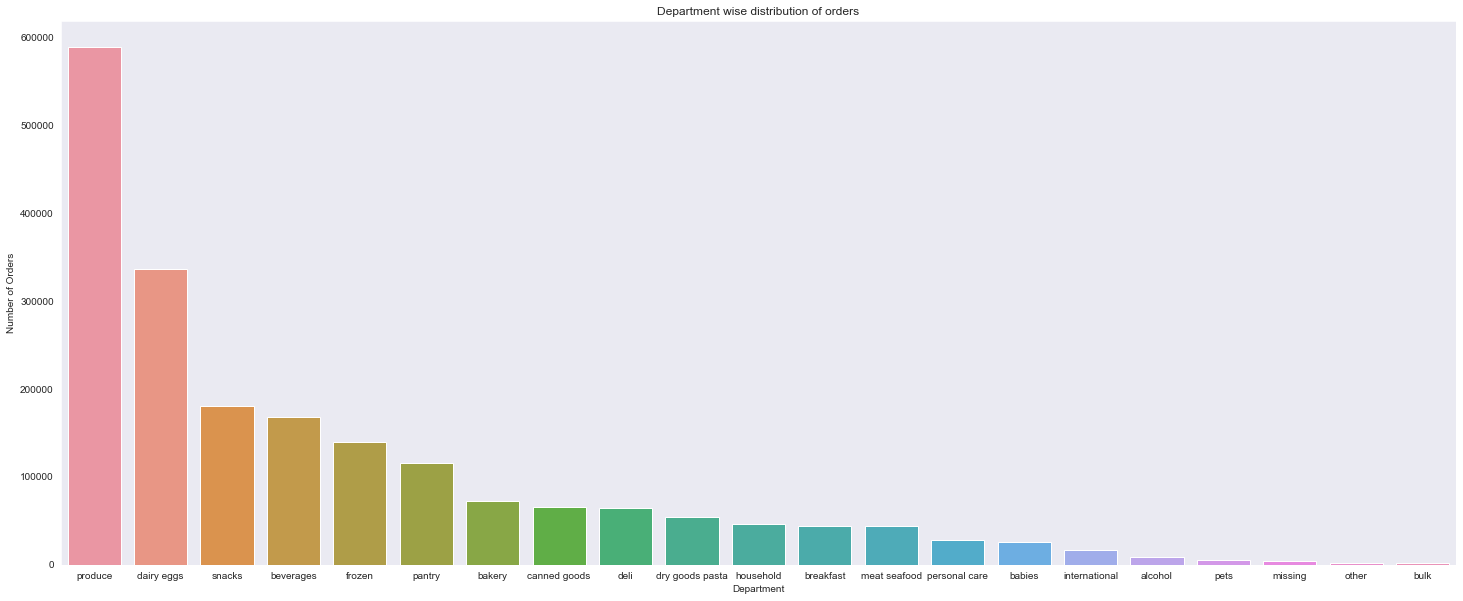

In [17]:
orders=data.groupby(['department'])['order_number'].aggregate('count').reset_index().sort_values(by='order_number',ascending=False)

sns.set_style('dark')
plt.figure(figsize=(25,10))
sns.barplot(orders.department,orders.order_number)
plt.xlabel("Department")
plt.ylabel("Number of Orders")
plt.title("Department wise distribution of orders")

C:\Users\Harshal Bhagat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Daywise orders')

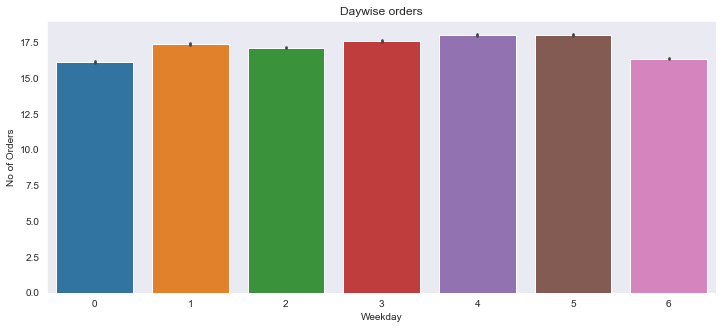

In [18]:
sns.set_style('dark')
plt.figure(figsize=(12,5))
sns.barplot(data.order_dow,data.order_number)
plt.xlabel("Weekday")
plt.ylabel("No of Orders")
plt.title("Daywise orders")

C:\Users\Harshal Bhagat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top performing Categories and worst performing Categories')

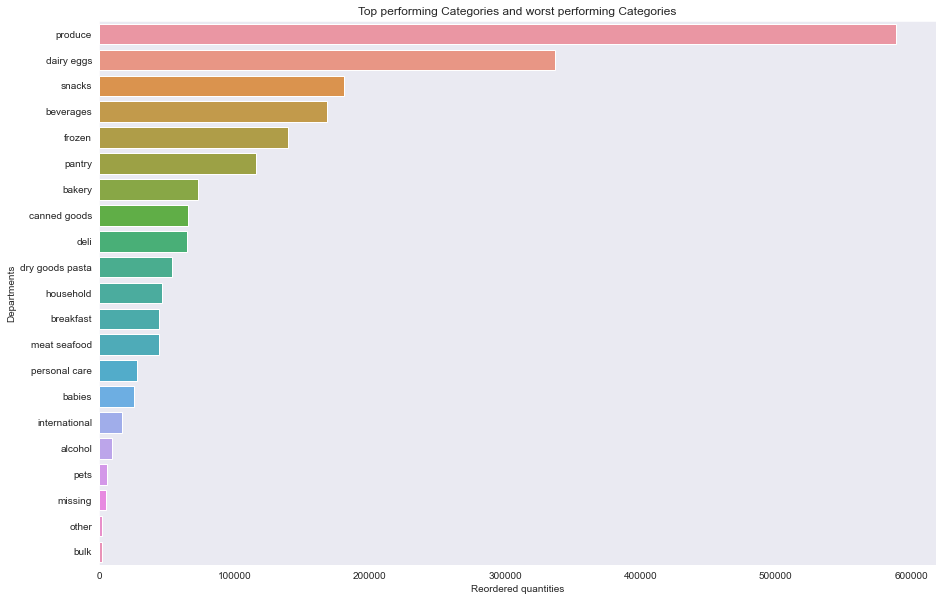

In [19]:
reorder=data.groupby(['department'])['reordered'].count().reset_index().sort_values(by='reordered',ascending=False)
reorder

sns.set_style('dark')
plt.figure(figsize=(15,10))
sns.barplot(reorder.reordered,reorder.department)
plt.xlabel('Reordered quantities')
plt.ylabel('Departments')
plt.title('Top performing Categories and worst performing Categories')

# Pre-Processing

In [20]:
cust_pred = pd.crosstab(data['user_id'], data['department'])
cust_pred

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,0,0,3,3
3,0,0,0,1,0,0,0,5,0,0,...,1,0,0,0,0,1,0,0,6,3
7,0,0,1,7,0,0,2,4,3,0,...,0,0,1,0,0,0,0,0,2,3
10,0,0,0,0,0,0,0,5,4,0,...,0,0,4,0,0,4,0,0,13,0
11,0,0,0,3,0,0,0,2,0,0,...,0,0,0,0,0,4,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0,0,1,0,0,0,0,6,0,2,...,0,0,1,0,0,0,0,1,4,0
206205,0,0,1,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
206206,0,0,0,2,0,0,0,1,1,0,...,0,1,1,0,0,0,0,0,1,4


In [21]:
train=cust_pred.values

# Model Building

In [22]:
from sklearn.cluster import KMeans

In [23]:
model1=KMeans(n_clusters=3,random_state=400)
model1.fit(train)

C:\Users\Harshal Bhagat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=400)

In [24]:
model1.labels_

array([0, 0, 0, ..., 0, 2, 0])

In [25]:
model1.inertia_

6284990.237454577

In [26]:
clusters=range(2,10)
Score=[]

for i in clusters:
    model=KMeans(n_clusters=i,random_state=430)
    model.fit(train)
    iner=model.inertia_
    Score.append(model.inertia_)
    
    print("The inertia for clster",i,"is",iner)

C:\Users\Harshal Bhagat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The inertia for clster 2 is 7543563.615122315


C:\Users\Harshal Bhagat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The inertia for clster 3 is 6284990.237454577


C:\Users\Harshal Bhagat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The inertia for clster 4 is 5731870.063681281


C:\Users\Harshal Bhagat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The inertia for clster 5 is 5281349.713016202


C:\Users\Harshal Bhagat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The inertia for clster 6 is 4996208.439176524


C:\Users\Harshal Bhagat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The inertia for clster 7 is 4763190.050096586


C:\Users\Harshal Bhagat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The inertia for clster 8 is 4586196.279372186


C:\Users\Harshal Bhagat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The inertia for clster 9 is 4435949.616214756


In [27]:
pd.Series(Score)

0    7.543564e+06
1    6.284990e+06
2    5.731870e+06
3    5.281350e+06
4    4.996208e+06
5    4.763190e+06
6    4.586196e+06
7    4.435950e+06
dtype: float64

# Choosing right no. of clusters

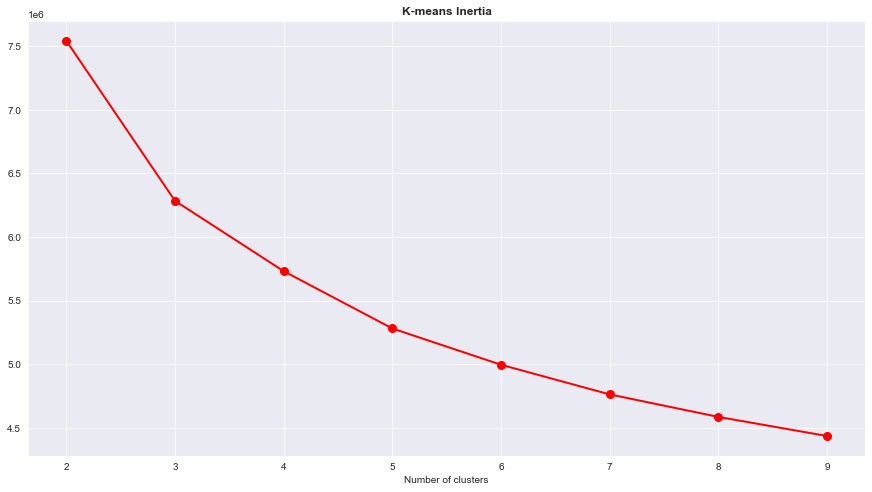

In [28]:
plt.figure(figsize=(15,8))
plt.plot(clusters, Score, marker='o',lw=2,ms=8,color='red')
plt.xlabel('Number of clusters')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)


# Training Final model

In [29]:
final_model=KMeans(n_clusters=5,random_state=400)
modelf=final_model.fit_predict(train)

C:\Users\Harshal Bhagat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
pd.Series(modelf).value_counts()


0    62615
4    26431
1     8070
3     6228
2     1929
dtype: int64

In [31]:
from sklearn.cluster import AgglomerativeClustering

# Training model
AgglomerativeC = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'ward')
y_AgglomerativeC = AgglomerativeC.fit_predict(data)


ValueError: could not convert string to float: 'pantry'